# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7500000000000004
Intercept (b): 1.3899999999999983
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


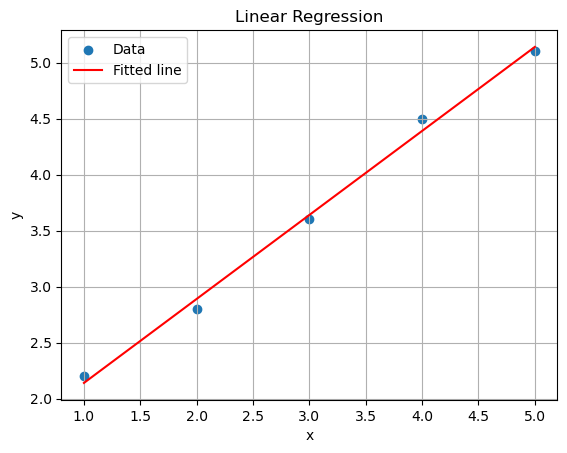

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Design Matrix A:
 [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]
Slope (m): 0.9496969696969693
Intercept (b): 0.8963636363636369
Rank of matrix A: 2


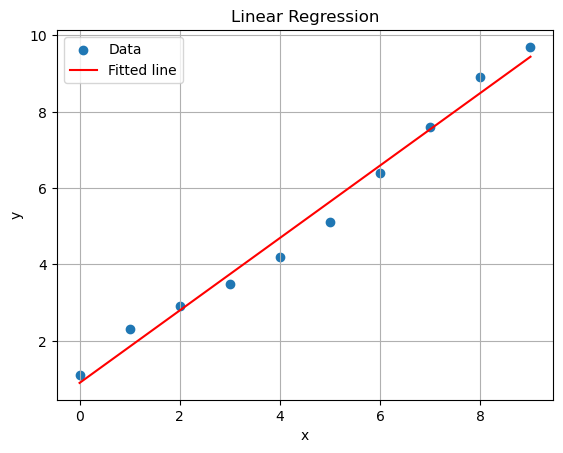

In [4]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1.1, 2.3, 2.9, 3.5, 4.2, 5.1, 6.4, 7.6, 8.9, 9.7])

A = np.vstack([x, np.ones(len(x))]).T
print ("Design Matrix A:\n", A)
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

print("Slope (m):", m)
print("Intercept (b):", b)
print("Rank of matrix A:", rank)

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


In [34]:
# Complete the Bisection Method implementation
def f(x):
    return x**3 - 2*x - 5
a = 2; b = 3; c = (a + b)/2
fab = f(a) * f(b)
print("f(a):",fab)
fca = f(c) * f(a)
print("f(c):",f(c))
if fab >= 0:
    a = c

if fab < 0:
    print("yes")
else:
    print("no")
print(f(c))
fca = f(c) * f(a)

if fca < 0:
    b = c
    print("<0")
else:
    a = c
    print(">0")
print(fca)
# print("Root found using Bisection Method:", root_bisection)
# Your code to plot the function and the root found


f(a): -16
f(c): 5.625
yes
5.625
<0
-5.625


In [46]:
# Dr. Han's code
def f(x):
    return x**3 - 2*x - 5
max_iteration = 100
tolerance = 0.000001
a = 2; b = 3
print("f(a):",f(a));print("f(b):",f(b))
fab = f(a) * f(b)
print("f(a)*f(b):",fab)

i = 0
while i <= max_iteration:
    print("iteration:", i+1)
    c = (a + b)/2
    print("f(c):",f(c))
    if f(c) * f(a) < 0:
        b = c
    else:
        a = c
    i += 1
    if abs(f(c)) <= tolerance:
        root_bisection = c
        break
print(f(a) * f(b))

f(a): -1
f(b): 16
f(a)*f(b): -16
iteration: 1
f(c): 5.625
iteration: 2
f(c): 1.890625
iteration: 3
f(c): 0.345703125
iteration: 4
f(c): -0.351318359375
iteration: 5
f(c): -0.008941650390625
iteration: 6
f(c): 0.16683578491210938
iteration: 7
f(c): 0.07856225967407227
iteration: 8
f(c): 0.03471428155899048
iteration: 9
f(c): 0.012862332165241241
iteration: 10
f(c): 0.00195434782654047
iteration: 11
f(c): -0.003495149197988212
iteration: 12
f(c): -0.0007707752083661035
iteration: 13
f(c): 0.000591692672969657
iteration: 14
f(c): -8.956467604548379e-05
iteration: 15
f(c): 0.00025105814629000633
iteration: 16
f(c): 8.074527208989934e-05
iteration: 17
f(c): -4.410067734994527e-06
iteration: 18
f(c): 3.8167510737707744e-05
iteration: 19
f(c): 1.6878698641420442e-05
iteration: 20
f(c): 6.234309738673005e-06
iteration: 21
f(c): 9.121195727601616e-07
-4.022509098286582e-12



### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [56]:
# Complete the Newton-Raphson Method implementation
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2
max_iteration = 100
tolerance = 0.000001
i = 0
xn=1
while i <= max_iteration:
    print("iteration:", i+1)
    xn1 = xn - (f(xn)/df(xn))
    print(xn1)
    i += 1
    if abs(xn1-xn) <= tolerance:
        break
    else:
        xn = xn1

root_newton=xn
print("Root found using Newton-Raphson Method:", root_newton)


iteration: 1
7.0
iteration: 2
4.76551724137931
iteration: 3
3.3487027594802825
iteration: 4
2.53159964100251
iteration: 5
2.1739158849392317
iteration: 6
2.097883686441764
iteration: 7
2.0945577158500575
iteration: 8
2.0945514815642077
iteration: 9
2.0945514815423265
Root found using Newton-Raphson Method: 2.0945514815642077


### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

In [ ]:
def y(x):
    return w/(24EI) * x(L**3 - 2*L*(x**2)+ x**3)

def df(x):
    return 3*x**2 - 2

maximum = dy(x) = 0
max_iteration = 100
tolerance = 0.000001
i = 0
xn=1
while i <= max_iteration:
    print("iteration:", i+1)
    xn1 = xn - (f(xn)/df(xn))
    print(xn1)
    i += 1
    if abs(xn1-xn) <= tolerance:
        break
    else:
        xn = xn1

root_newton=xn
print("Root found using Newton-Raphson Method:", root_newton)